In [1]:
import pandas as pd
import numpy as np

In [2]:
x1 = np.array(range(0, 100))
x2 = np.array(range(200, 300))

In [3]:
y1 = np.random.normal(75, 60, 100)
y2 = np.random.normal(50, 60, 100)

X1 = np.stack((x1, y1), axis=1)
X2 = np.stack((x2, y2), axis=1)

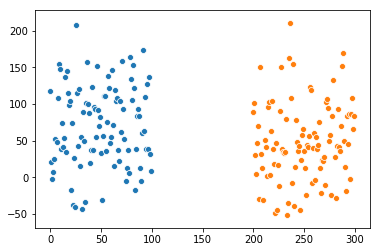

In [10]:
import seaborn as sns
sns.scatterplot(x1, y1)
sns.scatterplot(x2, y2)

In [5]:
def mean(x):
    return np.mean(x, axis = 0)

def var(x):
    return np.dot((x-mean(x)).transpose(), x - mean(x))

print(np.dot(y1-mean(y1), (y1-mean(y1)).transpose()))

295957.28396833915


## LDA:
**here we want to find a line to seperate the two classes**


we want:
1. maximize the distance between the central of the two class
$$||w\mu_1 - w\mu_2||_2^2$$
2. minimize the variance of the two class indivially
$$w^T\Sigma_1w + w^T\Sigma_2w$$

We define our goal as:

$$J = \frac{||w\mu_1 - w\mu_2||_2^2}{w^T\Sigma_1w + w^T\Sigma_2w}$$


define：$S_w = \Sigma_0 + \Sigma_1$ and $S_b = (\mu_0 - \mu_1)(\mu_0 - \mu_1)^T$

we let $w^TS_ww = 1$

Then the origional problem can be transformed into:

$$min -w^TS_bw$$

$$s.t. w^TS_ww = 1$$


***trick: $S_bw = \lambda (\mu_1 - \mu_2)$, since we can prove that $S_bw$ share the same direction with $\mu_1 - \mu_2$***


Finally we can get w as:


In [6]:
mu1 = mean(X1)
mu2 = mean(X2)
var1 = var(X1)
var2 = var(X2)

print(mu1, mu2,'\n\n', var1,'\n\n', var2)

[49.5       71.1049417] [249.5         48.28257982] 

 [[ 83325.           8752.11483251]
 [  8752.11483251 295957.28396834]] 

 [[ 83325.          16289.79677665]
 [ 16289.79677665 285362.86908531]]


In [7]:
sw =np.linalg.inv(var1 + var2)
# sw = 1/(var1 + var2)
w = np.dot(sw, (mu1 - mu2).transpose())
w

array([-1.21387699e-03,  9.15505197e-05])

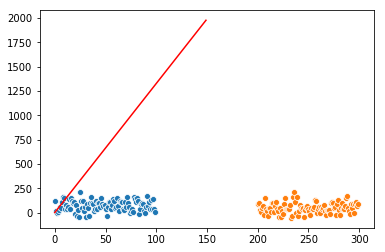

In [8]:
sns.scatterplot(x1, y1)
sns.scatterplot(x2, y2)
sns.lineplot(range(150), -w[0]/w[1] * range(150), color = 'r')

In [9]:
c1 = np.dot(w, mu1)
c2 = np.dot(w, mu2)
print(c1, c2)

-0.05357721653249118 -0.2984420131890296
